As funções de ativação **sigmoid** e **softmax** são usadas em redes neurais para mapear as saídas dos neurônios para valores que podem ser interpretados como probabilidades, mas elas são utilizadas em contextos diferentes e têm características distintas. Vamos explorar as diferenças principais:

### 1. **Forma da Função e Intervalo de Saída**:
   - **Sigmoid**:
     - Fórmula: \(\sigma(x) = \frac{1}{1 + e^{-x}}\)
     - Intervalo de saída: \([0, 1]\)
     - A função sigmoid mapeia qualquer entrada para um valor entre 0 e 1.
     - Gráfico: A sigmoid tem uma forma em "S", com uma transição suave de 0 para 1.
   - **Softmax**:
     - Fórmula: \(\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}\) (para todas as saídas \(x_i\) do vetor de entrada)
     - Intervalo de saída: \([0, 1]\) para cada elemento, e as saídas somam 1.
     - A função softmax mapeia um vetor de entradas para um vetor de probabilidades que somam 1.
     - Gráfico: A softmax não tem um gráfico simples, pois é aplicada a vetores de múltiplas dimensões.

### 2. **Aplicação Típica**:
   - **Sigmoid**:
     - **Usada em**: Camadas de saída para problemas de **classificação binária** (uma única saída).
     - **Interpretação**: O valor de saída da sigmoid é interpretado como a probabilidade da classe positiva (classe 1).
     - **Exemplo**: Em um modelo de classificação binária (como identificar se um e-mail é spam ou não), a sigmoid pode ser usada para gerar uma probabilidade para "spam".
   - **Softmax**:
     - **Usada em**: Camadas de saída para problemas de **classificação multiclasse** (múltiplas saídas).
     - **Interpretação**: Cada valor de saída é interpretado como a probabilidade de uma classe específica, e as probabilidades para todas as classes somam 1.
     - **Exemplo**: Em um modelo de classificação multiclasse (como identificar dígitos de 0 a 9), a softmax pode ser usada para gerar uma distribuição de probabilidades sobre as 10 classes.

### 3. **Comportamento e Características**:
   - **Sigmoid**:
     - A sigmoid tende a saturar (produzir valores muito próximos de 0 ou 1) para entradas muito negativas ou muito positivas, o que pode levar ao problema de gradientes desaparecendo durante o treinamento.
     - É adequada para saídas individuais ou independentes.
   - **Softmax**:
     - A softmax é projetada para lidar com múltiplas saídas de forma competitiva: aumentar a probabilidade de uma classe automaticamente reduz as probabilidades das outras classes.
     - As saídas da softmax são mutuamente exclusivas, ou seja, o modelo favorece uma classe em detrimento das outras.

### Resumo:

- **Sigmoid** é usada principalmente para **classificação binária**, produzindo uma única probabilidade de uma classe positiva.
- **Softmax** é usada para **classificação multiclasse**, produzindo uma distribuição de probabilidades sobre várias classes que somam 1.

Cada uma dessas funções de ativação é crucial no contexto correto, garantindo que as saídas do modelo sejam interpretáveis como probabilidades para problemas de classificação.

![Softmax Function](https://images.contentstack.io/v3/assets/bltac01ee6daa3a1e14/blte5e1674e3883fab3/65ef8ba4039fdd4df8335b7c/img_blog_image1_inline_(2).png?width=1024&disable=upscale&auto=webp)

In [2]:
import torch 
import torch.nn as nn
import numpy as np

In [4]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outpus = torch.softmax(x, dim=0)
print('softmax torch:', outpus)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


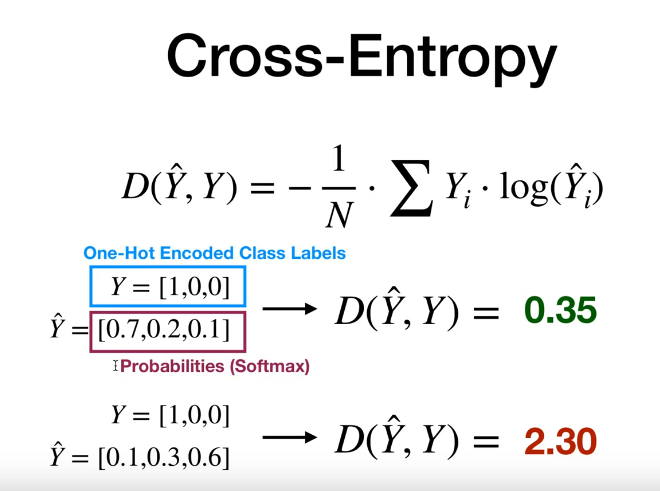

In [5]:
# with Numpy
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)

print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


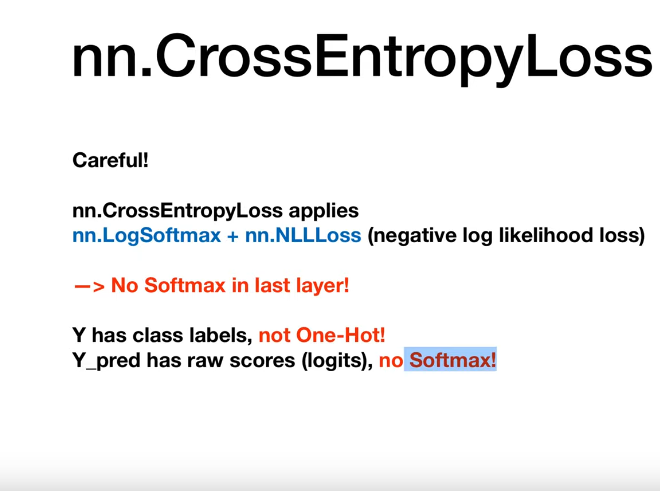

In [11]:
# with PyTorch

loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2, 0, 1])

# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss1 torch: {l1.item():.4f}')
print(f'Loss2 torch: {l2.item():.4f}')

Loss1 torch: 0.3018
Loss2 torch: 1.6242


In [12]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

tensor([2, 0, 1])
tensor([0, 2, 1])


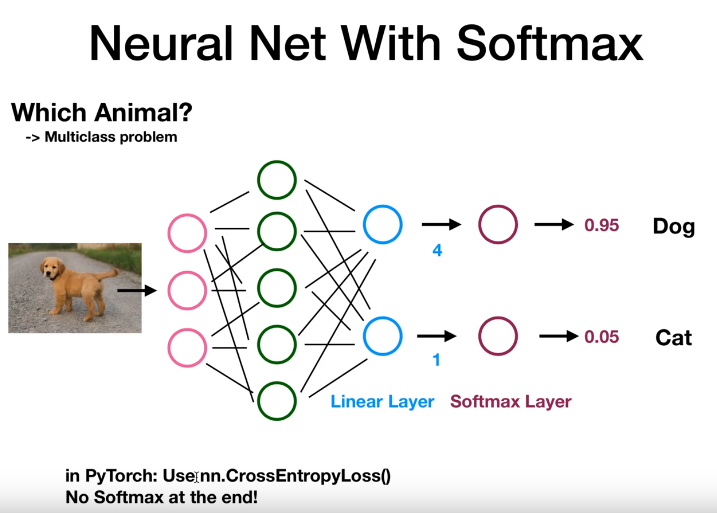

In [7]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        
        # Primeira camada linear que transforma o input de tamanho 
        # input_size para hidden_size.
        self.linear1 = nn.Linear(input_size, hidden_size) 
        
        # função de ativação, que introduz não-linearidade, valores negativos
        # se transformam em 0
        self.relu = nn.ReLU() 
        
        # Segunda camada linear que transforma o vetor de hidden_size para 
        # num_classes.
        self.linear2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        '''
        Define o fluxo dos dados pela rede:

        O input x passa pela primeira camada linear.
        O resultado é passado pela função de ativação ReLU.
        O resultado da ReLU é então passado pela segunda camada linear.
        O output final não tem uma função softmax porque ela será aplicada pelo critério de perda (nn.CrossEntropyLoss).
        '''
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies softmax

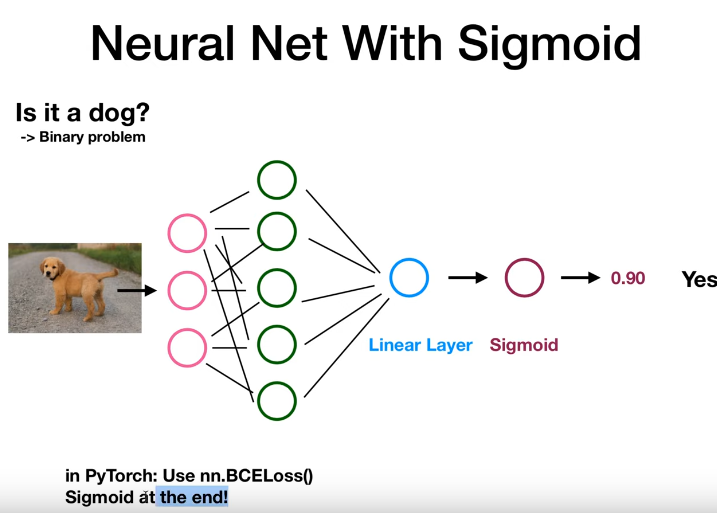